<a href="https://colab.research.google.com/github/pharringtonp19/presidential-policies/blob/main/notebooks/Fed_Assets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Install Libraries**

In [1]:
!pip install fredapi

### **Import Libraries**

In [2]:
import os
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### **FRED API**

In [5]:
fred = Fred(api_key=userdata.get('FRED'))

### **Read In Data**

In [14]:
# Fetch
walcl = fred.get_series('WALCL').to_frame('WALCL')          # weekly
cpi   = fred.get_series('CPIAUCSL').to_frame('CPI')          # monthly SA, 1982-84=100

# Align CPI to WALCL's dates and forward-fill between CPI releases
df = walcl.join(cpi, how='left')
df['CPI'] = df['CPI'].ffill()

# Pick a valid base CPI (e.g., latest available)
base_cpi = df['CPI'].dropna().iloc[-1]   # or df.loc['2020-01-01':'2020-01-31','CPI'].iloc[0]

# Real WALCL in constant dollars of the base month
df['WALCL_real'] = df['WALCL'] * (base_cpi / df['CPI'])

# If you only want rows where WALCL exists
df = df.dropna(subset=['WALCL_real'])

In [15]:
df.head()

,WALCL,CPI,WALCL_real
2003-01-01,730994.0,182.6,1.277382e+06
2003-01-08,723762.0,182.6,1.264744e+06
2003-01-15,720074.0,182.6,1.258300e+06
2003-01-22,735953.0,182.6,1.286048e+06
2003-01-29,712809.0,182.6,1.245604e+06


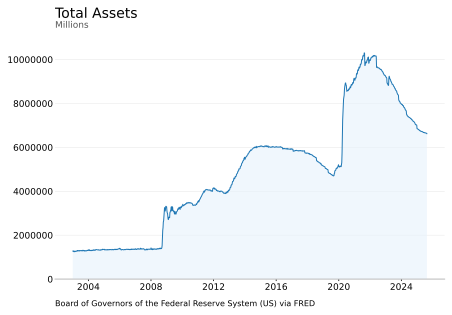

In [19]:
x = df.index
y = df['WALCL_real'].values

# --- NYT-style colors ---
line_color = '#1f77b4'
fill_color = "#e6f1fb"
forecast_fill = "#dfeaf7"
grid_color = '#e6e6e6'

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.fill_between(x, 0, y, color=fill_color, linewidth=0, zorder=1, alpha=0.6)
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(x, y, color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)


# tidy limits
ax.set_ylim(0, max(y)*1.10)
ax.set_axisbelow(True)            # any future gridlines stay behind
plt.ticklabel_format(style='plain', axis='y')  # <- disable sci notation on y-axis

# title + subtitle (left-aligned)
ax.text(0., 1.05, s='Total Assets', transform=ax.transAxes, size=14)
ax.text(0, 1.01, "Millions", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("Board of Governors of the Federal Reserve System (US) via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

fig.savefig("fed_assets.png", bbox_inches="tight", dpi=300)
plt.show()